In [47]:
from carbon.helpers.stdimports import *

# those are not available at the helpers level
from carbon.helpers.version import VersionRequirementNotMetError
from carbon.helpers.simulation import run_sim, plot_sim
from carbon.helpers.widgets import CheckboxManager, DropdownManager, PcSliderManager

# that's part of the test, that all those import from the helpers level
from carbon.helpers import fload, fsave
from carbon.helpers import Params
from carbon.helpers import pdread, pathtime, pathtime_yrs, pathtime_days, pdcols, j
from carbon.helpers import strategy
from carbon.helpers import require_version
from carbon.helpers import print_version

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = [12,6]
print_version(require="2.2.4")

Carbon v2.3-BETA3 (26/Jan/2022)
CarbonSimulatorUI v2.5 (25/Jan/2023)
CarbonOrderUI v1.6.1 (21/Jan/2023)


# Carbon Helpers (NBTest 052)

## params

In [48]:
p = Params(a=1, b=2)
assert p["a"] == 1
assert p.a == 1
assert p["c"] is None
print(p)
assert str(p) == "Params.construct({'a': 1, 'b': 2})"
assert p.params == {'a': 1, 'b': 2}
p["c"] = 5
assert p["c"] == 5
assert p.c == 5
result = p.add(d=10, e=11)
assert result is p
assert p["d"] == 10
assert p.e == 11
try:
    p.z
    raise RuntimeError("should raise")
except KeyError as e:
    print(e)

Params.construct({'a': 1, 'b': 2})
'z'


In [49]:
p = Params(a=1, b=2)
assert p.defaults == {}
p.set_default(b=20, c=3)
assert str(p) == "Params.construct({'a': 1, 'b': 2}, defaults={'b': 20, 'c': 3})"
assert p.b == 2
assert p.get_default("b") == 20
assert p.c == 3

p = Params(a=1, b=2)
assert p.get_default("c") is None
result = p.set_default()
assert result is p
p.set_default(c=10, d=11)
assert p.c == 10
assert p.d == 11
assert p.defaults == {'c': 10, 'd': 11}
assert p["e"] is None
try:
    p.e
    raise RuntimeError("should raise")
except KeyError as e:
    pass

In [50]:
p = Params.construct({'a': 1, 'b': 2}, defaults={'b': 20, 'c': 3})
assert p.a == 1
assert p.b == 2
assert p.c == 3
assert p.get_default("b") == 20
pp = Params.construct(p)
assert not pp is p
assert p.params == pp.params
try:
    ppp = Params.construct(p, defaults={"e":100})
except ValueError as e:
    print(e)

('Must not provide default in both constructor and dct', Params.construct({'a': 1, 'b': 2}, defaults={'b': 20, 'c': 3}), {'e': 100})


In [51]:
p  = Params.construct({'a': 1, 'b': 2})
defaults = {'b': 20, 'c': 3}
pp = Params.construct(p, defaults=defaults)
assert not pp is p
assert p.params == pp.params
assert pp.defaults == defaults
assert not pp.defaults is defaults
assert not pp._defaults is defaults

In [52]:
p = Params.construct()
assert p.params == {}
p = Params.construct(None)
assert p.params == {}

## widgets [NOTEST]

https://ipywidgets.readthedocs.io/en/7.6.3/examples/Widget%20Styling.html#The-Flexbox-layout

In [53]:
CM1 = CheckboxManager([i for i in range(10)])
CM1(vertical=False)

In [54]:
CM2 = CheckboxManager({i:678975437*(i+10) for i in range(5)}, objects=("a", "b", "c", "d", "e"))
CM2()

In [55]:
CM2.objects(), CM2.objects(checked=False)

((), ('a', 'b', 'c', 'd', 'e'))

In [56]:
SM = PcSliderManager([f"Slider #{i+1}" for i in range(5)])
SM()

In [57]:
SM.values

(0.0, 0.0, 0.0, 0.0, 0.0)

In [58]:
DD = DropdownManager([678975437*(i+10) for i in range(5)])
DD()

Dropdown(options=(('6789754370', '6789754370'), ('7468729807', '7468729807'), ('8147705244', '8147705244'), ('…

In [59]:
print(CM1.values, CM2.values, DD.value)

(False, False, False, False, False, False, False, False, False, False) (False, False, False, False, False) 6789754370


## widgets

In [60]:
CM = CheckboxManager([1,2,3], None)
assert CM.choice_ids == ('1', '2', '3')
assert CM.choice_descr == ('1', '2', '3')
assert CM.values == (False, False, False)
assert CheckboxManager({1:11, 2:12}).choice_ids == ('1', '2')
assert CheckboxManager({1:11, 2:12}).choice_descr == ('11', '12')
assert CheckboxManager([1,2,3], False).values == (False, False, False)
assert CheckboxManager([1,2,3], True).values == (True, True, True)
assert CheckboxManager([1,2,3], [10,0,1]).values == (True, False, True)
assert CheckboxManager([1,2,3], disabled=[10,0,1]).disabled == (True, False, True)
assert CheckboxManager.from_idvdct({10:10,12:0}).choice_ids == ('10', '12')
assert CheckboxManager.from_idvdct({10:10,12:0}).choice_descr == ('10', '12')
assert CheckboxManager.from_idvdct({10:10,12:0}).values == (True, False)
try:
    CheckboxManager([1,2,3], [10,0])
    raise
except ValueError as e:
    print(e)
try:
    CheckboxManager([1,2,3], disabled=[10,0])
    raise
except ValueError as e:
    print(e)

('len(values) [2] must be len(choices) [3]', [10, 0], [1, 2, 3])
('len(disabled) [2] must be len(choices) [3]', [10, 0], [1, 2, 3])


In [61]:
assert PcSliderManager({1:11, 2:12}).choice_ids == ('1', '2')
assert PcSliderManager({1:11, 2:12}).choice_descr == ('11', '12')
assert PcSliderManager([1,2,3], None).values == (0.,)*3
assert PcSliderManager([1,2,3], 0.3).values == (0.3, 0.3, 0.3)
assert PcSliderManager([1,2,3], [2,0.5,-1]).values == (1, 0.5, 0)
assert PcSliderManager([1,2,3], disabled=[10,0,1]).disabled == (True, False, True)
try:
    PcSliderManager([1,2,3], [10,0])
    raise
except ValueError as e:
    print(e)
try:
    PcSliderManager([1,2,3], disabled=[10,0])
    raise
except ValueError as e:
    print(e)

('len(values) [2] must be len(choices) [3]', [10, 0], [1, 2, 3])
('len(disabled) [2] must be len(choices) [3]', [10, 0], [1, 2, 3])


In [62]:
assert DropdownManager([1,2,3]).options == ('1', '2', '3')
assert DropdownManager([1,2,3]).labels == ('1', '2', '3')
assert DropdownManager([1,2,3], labels=[10,20,30]).options == ('1', '2', '3')
assert DropdownManager([1,2,3], labels=[10,20,30]).labels == ('10', '20', '30')
assert DropdownManager({1:10, 2:20, 3:30}).options == ('1', '2', '3')
assert DropdownManager({1:10, 2:20, 3:30}).labels == ('10', '20', '30')
assert DropdownManager({1:10, 2:20, 3:30}).value == "1"
assert DropdownManager({1:10, 2:20, 3:30}).label == "10"
assert DropdownManager({1:10, 2:20, 3:30}).result == ("1", "10")

## helpers stdimport

check that the following objects have been imported

In [63]:
np
plt
pd
CarbonSimulatorUI
CarbonOrderUI
P

carbon.pair.CarbonPair

In [64]:
sqrt
exp
log

<function math.log>

## helpers version

In [65]:
assert require_version("1.0", "1.0", raiseonfail=False) == True
assert require_version("2.0", "1.0", raiseonfail=False) == False
assert require_version("1.0", "2.0", raiseonfail=False) == True
assert require_version("1.0.1", "1.0", raiseonfail=False) == False
assert require_version("1.0", "1.0.1", raiseonfail=False) == True
assert require_version("1.0", "11.0", raiseonfail=False) == True
assert require_version("11.0", "1.0", raiseonfail=False) == False
assert require_version("1.3beta1", "1.3", raiseonfail=False) == True
assert require_version("1.3beta1", "1.3beta1", raiseonfail=False) == True
assert require_version("1.3-1", "1.3-2", raiseonfail=False) == True
assert require_version("1.3-2", "1.3-1", raiseonfail=False) == True
assert require_version("1.0", "1.0", raiseonfail=False) == True
assert require_version("1.0", "1.0", raiseonfail=False) == True

obviously must be tested with version >= 2.0

In [66]:
require_version("2.0")

In [67]:
require_version("1.0", "1.0")

In [68]:
try:
    require_version("2.0", "1.0")
    run("must raise error")
except VersionRequirementNotMetError as e:
    print(e)

('Version requirements not met (required = [2, 0], actual = [1, 0])', '2.0', '1.0')


## helpers strategy

In [69]:
# from carbon.helpers import strategy as _strategy
# help(_strategy)

In [70]:
# assert strategy.from_mgw() == strategy(p_buy_a=100.0, p_buy_b=100.0, p_sell_a=100, p_sell_b=100, 
#                                        amt_rsk=0, amt_csh=0, rsk='RSK', csh='CSH')

In [71]:
assert strategy.from_mgw(m=100) == strategy.from_mgw()
assert strategy.from_mgw(g=0) == strategy.from_mgw()
assert strategy.from_mgw(w=0) == strategy.from_mgw()

In [72]:
assert strategy.from_mgw(g=0.1).p_buy_a == 100/(1.05)
assert strategy.from_mgw(g=0.1).p_sell_a == 100*(1.05)
assert strategy.from_mgw(g=0.1).p_buy_b/strategy.from_mgw(g=0.1).p_buy_a > 0.999
assert strategy.from_mgw(g=0.1).p_buy_b/strategy.from_mgw(g=0.1).p_buy_a < 1.001
assert strategy.from_mgw(g=0.1).p_sell_b / strategy.from_mgw(g=0.1).p_sell_a < 1.001
assert strategy.from_mgw(g=0.1).p_sell_b / strategy.from_mgw(g=0.1).p_sell_a > 0.999

In [73]:
assert strategy.from_mgw(w=0.1).p_buy_a / strategy.from_mgw(w=0.1).p_sell_a > 0.999
assert strategy.from_mgw(w=0.1).p_buy_b / (100/1.1) > 0.999
assert strategy.from_mgw(w=0.1).p_buy_b / (100/1.1) < 1.001
assert strategy.from_mgw(w=0.1).p_sell_b / (100*1.1) > 0.999
assert strategy.from_mgw(w=0.1).p_sell_b / (100*1.1) < 1.001

In [74]:
assert strategy.from_mgw().slashpair == "RSK/CSH"
assert strategy.from_mgw(rsk="ETH", csh="USD").slashpair == "ETH/USD"

In [75]:
assert strategy(90, 80, 110, 120).dct == {
    'tkn': 'RSK',
    'amt_sell': 0,
    'psell_start': 90,
    'psell_end': 80,
    'amt_buy': 1e-10,
    'pbuy_start': 110,
    'pbuy_end': 120,
    'pair': 'RSK/CSH',
    'psell_marginal': None,
    'pbuy_marginal': None,
    'y_int_sell': None,
     'y_int_buy': None
}

In [76]:
assert strategy(90, 80, 110, 120).p == ('RSK', 0, 90, 80, 1e-10, 110, 120)

[strategy::p] DEPRECATED. PLEASE USE dct INSTEAD


In [77]:
Sim = CarbonSimulatorUI(pair="RSK/CSH", raiseonerror=True)
r = Sim.add_strategy(**strategy(p_buy_a=80, p_buy_b=70, p_sell_a=110, p_sell_b=120, amt_rsk=1, amt_csh=100).dct)["orders"]
r

,id,pair,tkn,y_int,y,y_unit,disabled,p_start,p_end,p_marg,p_unit,lid
0,0,RSKCSH,RSK,1.0,1.0,RSK,False,110.0,120.0,110.0,CSH per RSK,1
1,1,RSKCSH,CSH,100.0,100.0,CSH,False,80.0,70.0,80.0,CSH per RSK,0


In [78]:
assert r.iloc[0]["p_start"] == 110
assert r.iloc[0]["p_end"] == 120
assert r.iloc[1]["p_start"] == 80
assert r.iloc[1]["p_end"] == 70
assert r.iloc[0]["y"] == 1
assert r.iloc[1]["y"] == 100

In [79]:
Sim = CarbonSimulatorUI(pair="RSK/CSH", raiseonerror=True)
r = Sim.add_strategy(**strategy.from_mgw(m=100, g=0.5, w=0.5, amt_rsk=1, amt_csh=100).dct)["orders"]
r

,id,pair,tkn,y_int,y,y_unit,disabled,p_start,p_end,p_marg,p_unit,lid
0,0,RSKCSH,RSK,1.0,1.0,RSK,False,125.0,187.500000,125.0,CSH per RSK,1
1,1,RSKCSH,CSH,100.0,100.0,CSH,False,80.0,53.333333,80.0,CSH per RSK,0


In [80]:
assert r.iloc[0]["p_start"] == 125
assert r.iloc[0]["p_end"] == 187.5
assert r.iloc[1]["p_start"] == 80
assert r.iloc[0]["y"] == 1
assert r.iloc[1]["y"] == 100

## helpers pdread

In [81]:
# from carbon.helpers import pdread as _pdread
# help(_pdread)

In [82]:
DATAFN = "resources/data/RAN-050-00.pickle"
#DATAFN = "../data/RAN-050-00.pickle"

In [83]:
assert len(pdread(DATAFN))==101
assert pdread(DATAFN).iloc[0].index[5] == "p0005"
assert str(pdread(DATAFN).index[0]) == '2020-01-01 00:00:00'
assert len(pdread(DATAFN)["p0000"]) == len(pdread(DATAFN))
assert list(pdread(DATAFN)["p0000"]) == list(pdread(DATAFN, "p0000"))

In [84]:
# those assertions should be (mostly) independent from the test data used
ONEDAY = pd.Timedelta(days=1)
FDAY, LDAY = pdread(DATAFN).index[0], pdread(DATAFN).index[-1]
NDAY = LDAY - FDAY
assert pdread(DATAFN, from_ts=FDAY - 100*ONEDAY).index[-1] == LDAY
assert pdread(DATAFN, from_ts=LDAY - 100*ONEDAY).index[-1] == LDAY
assert pdread(DATAFN, from_ts=FDAY + 100*ONEDAY).index[-1] == LDAY
assert len(pdread(DATAFN, from_ts=LDAY + 1*ONEDAY))==0
assert pdread(DATAFN, from_ts=FDAY+20*ONEDAY).index[0] >= FDAY
assert pdread(DATAFN, period_days=NDAY/ONEDAY+10).index[-1] == LDAY
assert pdread(DATAFN, period_days=NDAY/ONEDAY-10).index[-1] <= LDAY
assert len(pdread(DATAFN, period_days=0))==1

In [85]:
# those assertions depend on the exact test data used
assert str(pdread(DATAFN                ).index[-1]) == '2020-12-31 06:00:00'
assert str(pdread(DATAFN, period_days=20).index[-1]) == '2020-01-19 06:18:00'
assert str(pdread(DATAFN, period_days=50).index[-1]) == '2020-02-17 11:34:48'

In [86]:
# those assertions depend on the exact test data used
assert str(pdread(DATAFN, from_ts="2000-01-01").index[0])  == '2020-01-01 00:00:00'
assert str(pdread(DATAFN, from_ts="2020-01-02").index[0])  == '2020-01-04 15:39:36'
assert str(pdread(DATAFN, from_ts="2020-01-02").index[-1]) == '2020-12-31 06:00:00'
assert str(pdread(DATAFN, from_ts="2020-05-02").index[-1]) == '2020-12-31 06:00:00'

In [87]:
# those assertions depend on the exact test data used
assert str(pdread(DATAFN, from_ts="2000-01-01", period_days=30).index[0])   == '2020-01-01 00:00:00'
assert str(pdread(DATAFN, from_ts="2000-01-01", period_days=30).index[-1])  == '2020-01-30 05:16:48'
assert str(pdread(DATAFN, from_ts="2020-03-01", period_days=30).index[0])   == '2020-03-03 02:13:12'
assert str(pdread(DATAFN, from_ts="2020-03-01", period_days=30).index[-1])  == '2020-03-28 15:50:24'

In [88]:
assert pathtime(pdread(DATAFN, "p0000")) == 1       # DEPRECATED
assert pathtime_yrs(pdread(DATAFN, "p0000")) == 1
assert pathtime_days(pdread(DATAFN, "p0000")) == 365.25

In [89]:
assert len(pdcols(DATAFN)) == 1000
assert (pdcols(DATAFN) == pdread(DATAFN).columns).all() == True
assert len(pdread(DATAFN, period_days=10)) == 3
assert len(pdread(DATAFN, period_pc=0.1)) == 11
assert len(pdread(DATAFN, from_ts="2020-07-01")) == 51
assert len(pdread(DATAFN, from_pc=0.5)) == 51

## demo 7 3 [NOTEST]

In [90]:
DATAID = "RAN-050-00"

DATAPATH = "resources/data"
#DATAPATH = "../data"           # uncomment to run this as Jupyter notebook

DATAFN = j(DATAPATH, f"{DATAID}.pickle")
print(f"Chose data id {DATAID}")

Chose data id RAN-050-00


In [91]:
strats = (
    strategy.from_mgw(m=100, g=0.10, w=0.05, amt_rsk=1, amt_csh=0),
)

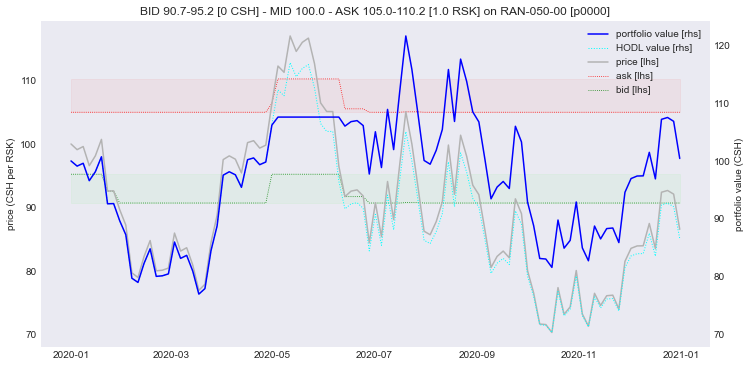

In [92]:
for colnm in ["p0000"]:
    for ix, strat in enumerate(strats):
    
        path = pdread(DATAFN, colnm)
        simresults = run_sim(strat, path)
        if DATAPATH == "../data":
            plot_sim(strat, path, simresults, f"{DATAID} [{colnm}]", params=None)
            plt.show()

In [93]:
# assert simresults.rskamt_r[0] == 1
# assert round(simresults.rskamt_r[35] - 0.57736478, 5) == 0
# assert simresults.cshamt_r[0] == 0
# assert round(simresults.cshamt_r[36] - 112.7164584255556, 5) == 0
# assert round(simresults.value_r[4] - 98.135103, 5) == 0
# assert round(simresults.value_r[-1] - 109.973544, 5) == 0
# assert str(simresults.value_r.index[0]) == '2020-01-01 00:00:00'
# assert str(simresults.value_r.index[-1]) == '2020-12-31 06:00:00'

In [94]:
simresults.rskamt_r[35]

0.0